In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ttrain = pd.read_csv('titanic_train.csv')
ttrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA

In [3]:
ttrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
ttrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
list_item = []

for column in ttrain.columns:
    list_item.append([column,
                    ttrain[column].dtype,
                    ttrain[column].isna().sum(),
                    round(ttrain[column].isna().sum()/len(ttrain[column])),
                    ttrain[column].nunique(),
                    list(ttrain[column].unique()[:2])
                     ])

desc_df = pd.DataFrame(data=list_item, columns=['features', 'dtype', 'null', 'null%', 'unique', 'unique_sample'])
desc_df

,features,dtype,null,null%,unique,unique_sample
0,PassengerId,int64,0,0.0,891,"[1, 2]"
1,Survived,int64,0,0.0,2,"[0, 1]"
2,Pclass,int64,0,0.0,3,"[3, 1]"
3,Name,object,0,0.0,891,"[Braund, Mr. Owen Harris, Cumings, Mrs. John B..."
4,Sex,object,0,0.0,2,"[male, female]"
5,Age,float64,177,0.0,88,"[22.0, 38.0]"
6,SibSp,int64,0,0.0,7,"[1, 0]"
7,Parch,int64,0,0.0,7,"[0, 1]"
8,Ticket,object,0,0.0,681,"[A/5 21171, PC 17599]"
9,Fare,float64,0,0.0,248,"[7.25, 71.2833]"


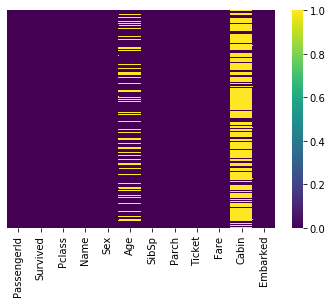

In [6]:
sns.heatmap(ttrain.isnull(), yticklabels=False, cbar=True, cmap='viridis')

In [7]:
ttrain['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

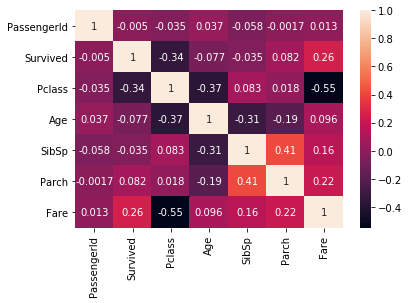

In [8]:
sns.heatmap(ttrain.corr(),annot=True)

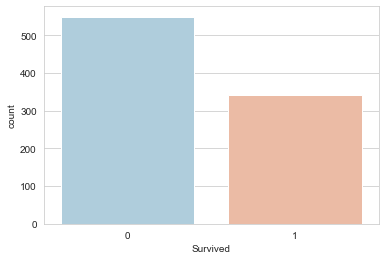

In [9]:
sns.set_style('whitegrid')

sns.countplot(x='Survived', data=ttrain, palette='RdBu_r')

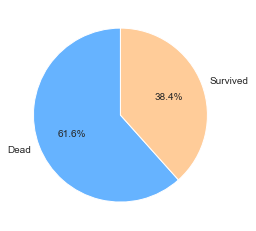

In [10]:
sizes =[len(ttrain[ttrain['Survived']==0]), len(ttrain[ttrain['Survived']==1])]
labels = ['Dead', 'Survived']
colors = ['#66b3ff', '#ffcc99']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.show()

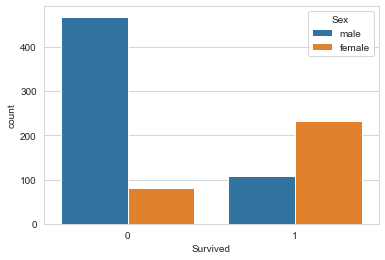

In [11]:
#Perbandingan Dead vs Survived berdasarkan SEX
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=ttrain)

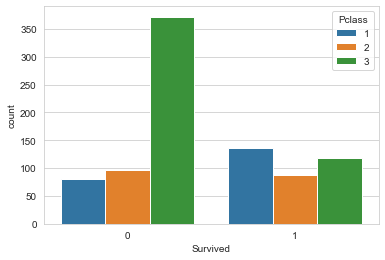

In [12]:
#Perbandingan Dead vs Survived berdasarkan PCLASS
sns.countplot(x='Survived', hue='Pclass', data=ttrain)

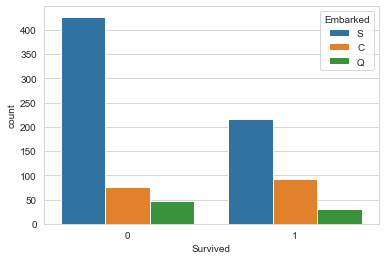

In [13]:
#penumpang dari embarked mana yg plg banyak Survived
sns.countplot(x='Survived', hue='Embarked', data=ttrain) 
#--> dari Southampton bnyk yg mati

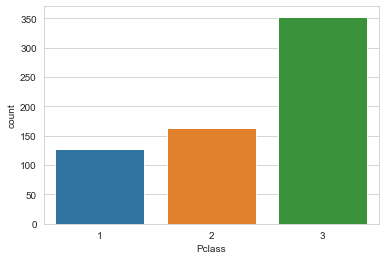

In [14]:
#Mungkin yg dari Southampton banyak di kelas 3?? 
#cek
south = ttrain[ttrain['Embarked']=='S']
sns.countplot(x='Pclass', data=south)
#ternyata benar, dari Southampton bnyk di Pclass 3

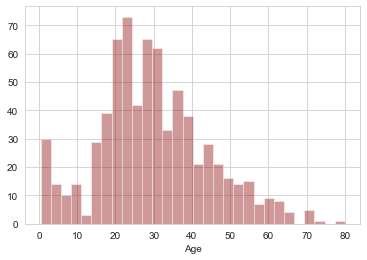

In [15]:
sns.distplot(ttrain['Age'].dropna(), kde=False, bins=30, color='darkred')

In [16]:
#mau lihat yg umurnya > 30
ttrain[ttrain['Age']>70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


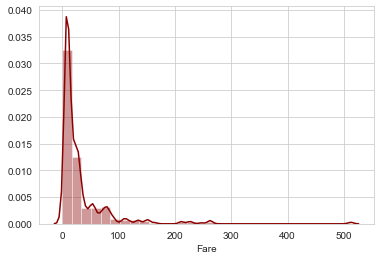

In [17]:
# distribusi harga tiket
sns.distplot(ttrain['Fare'].dropna(), color='darkred', bins=30)

In [18]:
#mau cek siap yg beli tiket yg harganya >300
ttrain[ttrain.Fare>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


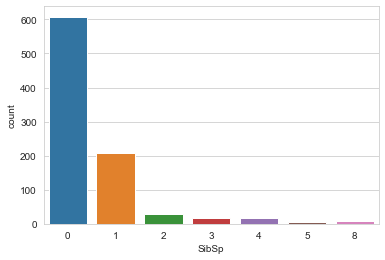

In [19]:
#cek SibSp
sns.countplot(x='SibSp', data=ttrain)
# --> bayank yg sendiri

In [20]:
# cek siapa yg bawa banyak keluarga/saudara

ttrain[ttrain['SibSp']==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [21]:
# Iseng ah cari si Rose, ada gak ya?
ttrain[ttrain['Name'].str.contains('Rose')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.35,NaN,S


In [22]:
# Iseng ah cari si Jack, ada gak ya?
ttrain[ttrain['Name'].str.contains('Jack')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C


## Dealing with Missing Data

In [23]:
desc_df[['features', 'null', 'null%']]

,features,null,null%
0,PassengerId,0,0.0
1,Survived,0,0.0
2,Pclass,0,0.0
3,Name,0,0.0
4,Sex,0,0.0
5,Age,177,0.0
6,SibSp,0,0.0
7,Parch,0,0.0
8,Ticket,0,0.0
9,Fare,0,0.0


### Dealing with Age Missing Data

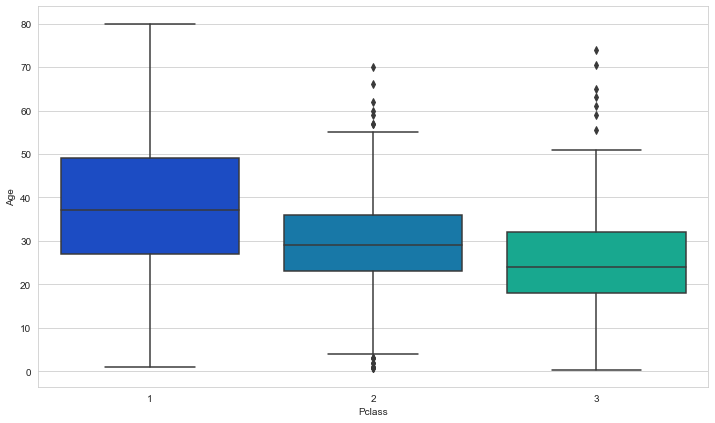

In [24]:
plt.figure(figsize=(12,7))

sns.boxplot(x='Pclass', y='Age', data=ttrain, palette='winter')

In [25]:
# pengen tahu rata2 umur tiap Pclass
ttrain.groupby('Pclass')[['Age']].mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [26]:
#fucntion untuk mengimputasi umur yg NaN berdasarkan rata2 umur tiap Pclass

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age
    

In [27]:
ttrain['Age'] = ttrain[['Age','Pclass']].apply(impute_age, axis=1)

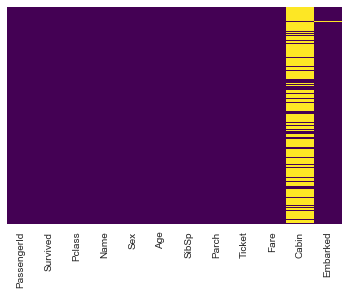

In [28]:
#cek heatmap null
sns.heatmap(ttrain.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Cabin

In [29]:
ttrain[['Cabin']]

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN
...,...
886,NaN
887,B42
888,NaN
889,C148


In [30]:
#drop aja, kebanyakn missing, mau di impute juga bingung, kebanyakan uniquenya
ttrain.drop('Cabin',axis=1,inplace=True)

In [31]:
ttrain.info() #--> Cabin udh ilang

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### Embarked

In [32]:
#drop rows yg NaN
ttrain.dropna(axis=0, inplace=True)

In [33]:
ttrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [34]:
ttrain.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

### One Hot Encoding / get dummies

In [35]:
desc_df

,features,dtype,null,null%,unique,unique_sample
0,PassengerId,int64,0,0.0,891,"[1, 2]"
1,Survived,int64,0,0.0,2,"[0, 1]"
2,Pclass,int64,0,0.0,3,"[3, 1]"
3,Name,object,0,0.0,891,"[Braund, Mr. Owen Harris, Cumings, Mrs. John B..."
4,Sex,object,0,0.0,2,"[male, female]"
5,Age,float64,177,0.0,88,"[22.0, 38.0]"
6,SibSp,int64,0,0.0,7,"[1, 0]"
7,Parch,int64,0,0.0,7,"[0, 1]"
8,Ticket,object,0,0.0,681,"[A/5 21171, PC 17599]"
9,Fare,float64,0,0.0,248,"[7.25, 71.2833]"


In [36]:
# Mungkin 'Sex' & 'Embarked' akan di dummies / one hot encoding

In [37]:
sex = pd.get_dummies(ttrain['Sex'], drop_first=True)
embark = pd.get_dummies(ttrain['Embarked'], drop_first=False)

In [38]:
# dropping unused columns
# Sex & embarked di drop krn sudah di dummy
# Name, Ticket, Passenger Id di drop karena gak signifikan terhadap Survived

ttrain.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1, inplace=True)

In [39]:
ttrain.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [40]:
# Concat
ttrain = pd.concat([ttrain,sex,embark],axis=1)

In [41]:
ttrain.head() #--> Data set yg sudah bersih / clean

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


## Train Test Split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = ttrain.drop('Survived',axis=1)
y = ttrain['Survived']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
486,1,35.0,1,0,90.0000,0,0,0,1
293,3,24.0,0,0,8.8500,0,0,0,1
173,3,21.0,0,0,7.9250,1,0,0,1
450,2,36.0,1,2,27.7500,1,0,0,1
361,2,29.0,1,0,27.7208,1,1,0,0
...,...,...,...,...,...,...,...,...,...
107,3,25.0,0,0,7.7750,1,0,0,1
271,3,25.0,0,0,0.0000,1,0,0,1
862,1,48.0,0,0,25.9292,0,0,0,1
436,3,21.0,2,2,34.3750,0,0,0,1


In [46]:
y_train

486    1
293    0
173    0
450    0
361    0
      ..
107    1
271    1
862    1
436    0
103    0
Name: Survived, Length: 622, dtype: int64

## Train Model

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
log = LogisticRegression(solver='lbfgs')
log.fit(X_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predict

In [49]:
#using X_train
train_survived = log.predict(X_train)
train_survived

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,

In [50]:
from sklearn.metrics import confusion_matrix
cfmtx = confusion_matrix(y_train, train_survived)

In [51]:
cfmtx

array([[333,  49],
       [ 74, 166]], dtype=int64)

In [52]:
train_conf_mtx = pd.DataFrame(data=cfmtx, columns=['P Dead', 'P Survived'], index=['A Dead', 'A Survived'])
train_conf_mtx['Actual Cases'] = train_conf_mtx['P Dead'] + train_conf_mtx['P Survived']

train_pred_cases = pd.DataFrame({'P Dead': 392, 'P Survived':230, 'Actual Cases':sum(train_conf_mtx['Actual Cases'])},
                               index=['Predicted Cases']) #name index

train_conf_mtx = pd.concat([train_conf_mtx, train_pred_cases],axis=0)
train_conf_mtx

,P Dead,P Survived,Actual Cases
A Dead,333,49,382
A Survived,74,166,240
Predicted Cases,392,230,622


In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_train,train_survived, target_names=['0/-', '1/+']))

              precision    recall  f1-score   support

         0/-       0.82      0.87      0.84       382
         1/+       0.77      0.69      0.73       240

    accuracy                           0.80       622
   macro avg       0.80      0.78      0.79       622
weighted avg       0.80      0.80      0.80       622



* Prec(-) : dari semua tebakan (-), berapa proportion yg beneran (-) = 0.82
* Prec(+) : dari semua tebakan (+), berapa proportion yg beneran (+) = 0.77
* Recall(-) : dari semua actual cases (-), berapa proportion yg beneran memprediksi(-) : = 0.87
* Recall(+) : dari semua actual cases (+), berapa proportion yg beneran memprediksi (-) = 0.69


In [55]:
#Type I Error/FPR train
49/(49+333)

0.12827225130890052

In [56]:
#Type II Error/FNR train
74/(74+166)

0.30833333333333335

In [57]:
#ISENG
#coba cek predict pk X_test
test_survived = log.predict(X_test)
test_survived

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [58]:
#coba bandingin report predict(X_train) dgn predict(X_test)
print(classification_report(y_test,test_survived, target_names=['0/-', '1/+']))

              precision    recall  f1-score   support

         0/-       0.85      0.84      0.84       167
         1/+       0.74      0.75      0.74       100

    accuracy                           0.81       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.81      0.81      0.81       267



In [59]:
from sklearn.metrics import plot_confusion_matrix

<Figure size 864x576 with 0 Axes>

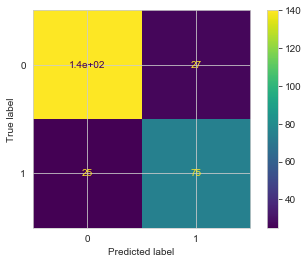

In [60]:
plt.figure(figsize=(12,8))
plot_confusion_matrix(log,X_test,y_test)

In [61]:
test_cfmtx = confusion_matrix(y_test, test_survived)
test_cfmtx

array([[140,  27],
       [ 25,  75]], dtype=int64)

In [62]:
#Type I Error/FPR test
27/(27+140)

0.16167664670658682

In [63]:
#Type II Error/FNR test
25/(25+75)

0.25

## ROC dan AUC
* ROC = Receiver Operating Characteristic
* AUC = Area Under Curve
-----------------------------------
* ROC = Untuk membadingkan antar `modelA`-`modelB` / `metodeA`-`metodeB` mana yg lebih baik, atau membandingkan `train-test`(checking Underfit / Overfit model) 
* AUC = Untuk menilai seberapa baik model kita memisahkan mana yg 0 sebagai 0, dan memisahkan mana yang 1 sebagai 1. output : 0-1

In [64]:
proba_train = log.predict_proba(X_train)
proba_train

array([[0.12343604, 0.87656396],
       [0.33641952, 0.66358048],
       [0.85056983, 0.14943017],
       ...,
       [0.16342677, 0.83657323],
       [0.50217399, 0.49782601],
       [0.90907155, 0.09092845]])

In [65]:
train_survived

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,

In [66]:
from sklearn.metrics import roc_curve,roc_auc_score, auc

In [67]:
#roc_curve --> menilai True Positive Rate, False Positive Rate

In [68]:
# ambil hasil prediksi yg 1 / Survived
probpred1 = proba_train[:,1]
probpred1

array([0.87656396, 0.66358048, 0.14943017, 0.14151432, 0.28022584,
       0.48449337, 0.21091059, 0.15549106, 0.16845211, 0.04963211,
       0.81013952, 0.12701343, 0.22574647, 0.29743554, 0.87500356,
       0.68621006, 0.95434617, 0.25022118, 0.67823994, 0.1494764 ,
       0.91651514, 0.30682995, 0.3890974 , 0.15551812, 0.91620692,
       0.68359079, 0.32786623, 0.24391789, 0.7751426 , 0.7943518 ,
       0.10754818, 0.64077538, 0.48291792, 0.07965306, 0.11689677,
       0.65212486, 0.27098488, 0.61690835, 0.93117844, 0.7387325 ,
       0.76661361, 0.00414616, 0.57353109, 0.75381719, 0.81914326,
       0.57967538, 0.16475159, 0.86328165, 0.82353728, 0.54529392,
       0.83204971, 0.51842357, 0.39495727, 0.094748  , 0.19738776,
       0.14938395, 0.09113208, 0.37089986, 0.2041947 , 0.1945124 ,
       0.66676993, 0.57353109, 0.12701343, 0.20735881, 0.47614422,
       0.34517043, 0.31975877, 0.88404268, 0.25220485, 0.54841135,
       0.10353578, 0.67823994, 0.11218011, 0.15556589, 0.35152

In [69]:
#probablitias yg diprediksi 1
probpred1 = proba_train[:,1]
fpr1, tpr1, threshold1 = roc_curve(y_train,probpred1)
roc_auc1 = auc(fpr1,tpr1)

In [70]:
fpr1

array([0.        , 0.        , 0.        , 0.0026178 , 0.0026178 ,
       0.0052356 , 0.0052356 , 0.0078534 , 0.0078534 , 0.0078534 ,
       0.0104712 , 0.0104712 , 0.01308901, 0.01308901, 0.01570681,
       0.01570681, 0.01832461, 0.01832461, 0.02094241, 0.02094241,
       0.02879581, 0.02879581, 0.02879581, 0.03141361, 0.03141361,
       0.03403141, 0.03403141, 0.03664921, 0.03664921, 0.03926702,
       0.03926702, 0.04188482, 0.04188482, 0.04712042, 0.04712042,
       0.04973822, 0.04973822, 0.05235602, 0.05235602, 0.05497382,
       0.05497382, 0.05759162, 0.05759162, 0.06282723, 0.06806283,
       0.06806283, 0.07329843, 0.07329843, 0.08115183, 0.08115183,
       0.08900524, 0.08900524, 0.09162304, 0.09162304, 0.09424084,
       0.09424084, 0.09685864, 0.09685864, 0.09685864, 0.09947644,
       0.09947644, 0.10471204, 0.10471204, 0.11256545, 0.11256545,
       0.11518325, 0.11518325, 0.12827225, 0.12827225, 0.14136126,
       0.14136126, 0.14659686, 0.14659686, 0.15183246, 0.15183

In [71]:
tpr1

array([0.        , 0.00416667, 0.19166667, 0.19166667, 0.30416667,
       0.30416667, 0.3125    , 0.3125    , 0.3375    , 0.34583333,
       0.34583333, 0.35416667, 0.35416667, 0.42083333, 0.42083333,
       0.42916667, 0.42916667, 0.44583333, 0.44583333, 0.45      ,
       0.45      , 0.45833333, 0.48333333, 0.48333333, 0.49583333,
       0.49583333, 0.50833333, 0.50833333, 0.52083333, 0.52083333,
       0.525     , 0.525     , 0.53333333, 0.53333333, 0.54583333,
       0.56666667, 0.57916667, 0.57916667, 0.59166667, 0.59166667,
       0.59583333, 0.59583333, 0.6       , 0.6       , 0.6       ,
       0.61666667, 0.61666667, 0.62083333, 0.62083333, 0.63333333,
       0.63333333, 0.6375    , 0.6375    , 0.64166667, 0.64166667,
       0.64583333, 0.64583333, 0.65416667, 0.66666667, 0.66666667,
       0.67083333, 0.67083333, 0.67916667, 0.67916667, 0.68333333,
       0.68333333, 0.6875    , 0.6875    , 0.69166667, 0.69166667,
       0.7       , 0.7       , 0.725     , 0.725     , 0.72916

In [72]:
threshold1

array([1.98565617, 0.98565617, 0.89335156, 0.89245831, 0.83204971,
       0.83127765, 0.82991821, 0.82740909, 0.81521187, 0.81013952,
       0.80853855, 0.80628444, 0.80581205, 0.77158702, 0.77103772,
       0.76794311, 0.76663912, 0.76198491, 0.75906432, 0.75829382,
       0.74060502, 0.7387325 , 0.72040535, 0.71727769, 0.70820206,
       0.70416498, 0.69881543, 0.69604092, 0.68760867, 0.6867367 ,
       0.68621006, 0.6853294 , 0.68359079, 0.67834649, 0.67823994,
       0.6781579 , 0.67737176, 0.67342479, 0.67030773, 0.66883927,
       0.66676993, 0.66358048, 0.65946873, 0.65245482, 0.65212486,
       0.63836705, 0.63568847, 0.63212391, 0.61920603, 0.60834938,
       0.58707362, 0.58637318, 0.58578797, 0.58495743, 0.5824033 ,
       0.57967538, 0.57671659, 0.57376891, 0.57353109, 0.56944344,
       0.56386617, 0.54841135, 0.54529392, 0.53251435, 0.53179299,
       0.52920062, 0.5196559 , 0.51135303, 0.50863283, 0.48449337,
       0.47804841, 0.47363446, 0.44381291, 0.43951801, 0.43594

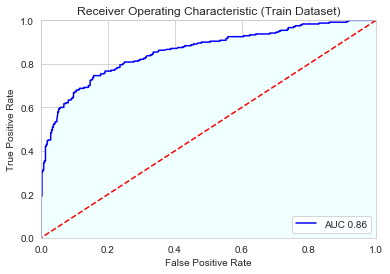

In [73]:
plt.title('Receiver Operating Characteristic (Train Dataset)')
plt.plot(fpr1, tpr1, 'b', label = 'AUC {}'.format(round(roc_auc1,2))) #fpr hrs di x, tpr di y
plt.legend(loc='lower right') #posisi legend
plt.plot([1,0],[1,0], 'r--') # buat garis lurus dari kiri bawah ke kanan atas
plt.xlim([0,1]) #sumbu x minimal di 0 maksimal di 1
plt.ylim([0,1]) #sumbu x minimal di 0 maksimal di 1
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.fill_between(fpr1, tpr1, 0, facecolor='azure', alpha=1)

plt.show()

In [74]:
# model kita bagus dalam memisahkan yg seharsnya 0 menjadi 0 dan 1 menjadi 1 --> skornya 0.86
#biru masih diatas merah --> masih bagus

In [75]:
roc_df = pd.DataFrame({'fpr':fpr1, 'tpr':tpr1, 'threshold':threshold1})
roc_df

,fpr,tpr,threshold
0,0.000000,0.000000,1.985656
1,0.000000,0.004167,0.985656
2,0.000000,0.191667,0.893352
3,0.002618,0.191667,0.892458
4,0.002618,0.304167,0.832050
...,...,...,...
207,0.918848,1.000000,0.053682
208,0.931937,1.000000,0.051144
209,0.937173,1.000000,0.050961
210,0.992147,1.000000,0.014250


In [76]:
roc_df[roc_df['fpr'] == roc_df['fpr'].min()]

,fpr,tpr,threshold
0,0.0,0.000000,1.985656
1,0.0,0.004167,0.985656
2,0.0,0.191667,0.893352


In [77]:
roc_df[roc_df['tpr'] >= 0.8].sort_values('fpr') # tpr > 0.8 dipilih karena punya tpr yg baik dan fpr yg rendah

,fpr,tpr,threshold
100,0.243455,0.800000,0.323422
101,0.246073,0.800000,0.319759
102,0.248691,0.804167,0.314121
103,0.248691,0.808333,0.313608
104,0.277487,0.808333,0.289997
...,...,...,...
207,0.918848,1.000000,0.053682
208,0.931937,1.000000,0.051144
209,0.937173,1.000000,0.050961
210,0.992147,1.000000,0.014250


In [78]:
# fpr terbaik dari data diatas adalah 0.24, dgn theshold 0.32
# dgn threshold 0.24 & fpr 0.24, apakah kita terima dengan nilai FPR tsb?  --> kembali kepada kasusnya
# Jika blm terima nilai fpr tsb, coba metode lain, e.g oversampling,undersampling,SMOTE
# atau bahkan jika masih blm terima dgn fprnya, bisa ganti model ML

In [79]:
###############################################################################

In [80]:
# 21/04/2020

In [81]:
#Coba dgn data test

In [82]:
pred_survived_test = log.predict(X_test)
pred_survived_proba = log.predict_proba(X_test)

In [83]:
confusion_matrix(y_test, pred_survived_test)

array([[140,  27],
       [ 25,  75]], dtype=int64)

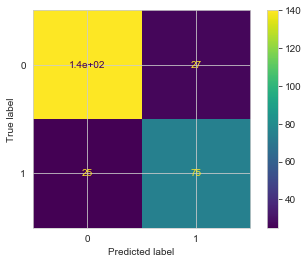

In [84]:
plot_confusion_matrix(log, X_test, y_test)

In [85]:
#buat Confusion Matrix berupa data frame
conf_mtx_test = pd.DataFrame(data=confusion_matrix(y_test, pred_survived_test), columns=['P Dead', 'P Survived'], index=['A Dead', 'A Survived'])
conf_mtx_test['Actual Cases']=conf_mtx_test['P Dead']+conf_mtx_test['P Survived']
pred_cases_test = pd.DataFrame({'P Dead':[sum(conf_mtx_test['P Dead'])],
                               'P Survived':[sum(conf_mtx_test['P Survived'])],
                               'Actual Cases': [sum(conf_mtx_test['Actual Cases'])]}, index=['Predicted Cases'])

conf_mtx_test = pd.concat([conf_mtx_test, pred_cases_test],axis=0)
conf_mtx_test

,P Dead,P Survived,Actual Cases
A Dead,140,27,167
A Survived,25,75,100
Predicted Cases,165,102,267


In [86]:
print(classification_report(y_test, pred_survived_test))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       167
           1       0.74      0.75      0.74       100

    accuracy                           0.81       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.81      0.81      0.81       267



In [87]:
pred_survived_proba

array([[0.88786311, 0.11213689],
       [0.04408267, 0.95591733],
       [0.22181801, 0.77818199],
       [0.75601975, 0.24398025],
       [0.0376034 , 0.9623966 ],
       [0.88334955, 0.11665045],
       [0.71000306, 0.28999694],
       [0.85029689, 0.14970311],
       [0.08153554, 0.91846446],
       [0.03610536, 0.96389464],
       [0.60671565, 0.39328435],
       [0.4432302 , 0.5567698 ],
       [0.95910917, 0.04089083],
       [0.86506026, 0.13493974],
       [0.89201334, 0.10798666],
       [0.88354227, 0.11645773],
       [0.66516709, 0.33483291],
       [0.7958053 , 0.2041947 ],
       [0.72923981, 0.27076019],
       [0.87298657, 0.12701343],
       [0.75977741, 0.24022259],
       [0.0989906 , 0.9010094 ],
       [0.93745783, 0.06254217],
       [0.46964113, 0.53035887],
       [0.87293682, 0.12706318],
       [0.4931623 , 0.5068377 ],
       [0.69946579, 0.30053421],
       [0.17646272, 0.82353728],
       [0.59988604, 0.40011396],
       [0.72107279, 0.27892721],
       [0.

In [88]:
# Coba ROC AUC TEST

In [89]:
predtest1 = pred_survived_proba[:,1]
fprts1, tprts1, thresholdts1 = roc_curve(y_test, predtest1)

roc_auc_test1 = auc(fprts1, tprts1)

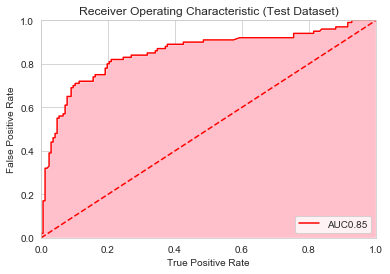

In [90]:
plt.title('Receiver Operating Characteristic (Test Dataset)')

plt.plot(fprts1,tprts1, 'r', label='AUC{}'.format(round(roc_auc_test1,2)))
plt.legend(loc = 'lower right')

plt.plot([0,1],[0,1], 'r--')

plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')

plt.fill_between (fprts1, tprts1, 0, facecolor='pink', alpha=1)

In [91]:
# Perbandingan ROC AUC TRAIN dgn TEST

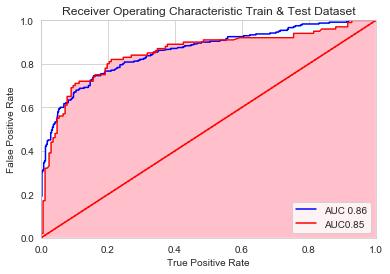

In [92]:
plt.title('Receiver Operating Characteristic Train & Test Dataset')

plt.plot(fpr1, tpr1, 'b', label = 'AUC {}'.format(round(roc_auc1,2))) #fpr hrs di x, tpr di y
plt.legend(loc='lower right') #posisi legend
plt.plot([1,0],[1,0], 'r--') # buat garis lurus dari kiri bawah ke kanan atas
plt.xlim([0,1]) #sumbu x minimal di 0 maksimal di 1
plt.ylim([0,1]) #sumbu x minimal di 0 maksimal di 1
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.fill_between(fpr1, tpr1, 0, facecolor='azure', alpha=1)
###############################
plt.plot(fprts1,tprts1, 'r', label='AUC{}'.format(round(roc_auc_test1,2)))
plt.legend(loc = 'lower right')

plt.plot([0,1],[0,1], 'r--')

plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')

plt.fill_between (fprts1, tprts1, 0, facecolor='pink', alpha=1)

# Oversampling, Undersampling & SMOTE

In [93]:
# Anggap saja dataset train titanic gak balanced, maka kita gunakan metode ini

* Oversampling = kita hanya memperbanyak data (yg minoritas) berdasarkan data yang sudag ada (duplikasi)
* Undesampling = kita hanya mengurangi data (yg mayoritas) sehingga menyamai jumlah yg minoritas, tp metode ini punya potensi  menghilangkan data, oleh karena itu metode ini jrg digunakan
* SMOTE = membuat sebuah data baru, dengan mengadaptasi algoritma KNN

## Oversampling

In [94]:
# tahap pertama harus menyatukan X_train, y_train

In [95]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
486,1,35.0,1,0,90.0000,0,0,0,1
293,3,24.0,0,0,8.8500,0,0,0,1
173,3,21.0,0,0,7.9250,1,0,0,1
450,2,36.0,1,2,27.7500,1,0,0,1
361,2,29.0,1,0,27.7208,1,1,0,0
...,...,...,...,...,...,...,...,...,...
107,3,25.0,0,0,7.7750,1,0,0,1
271,3,25.0,0,0,0.0000,1,0,0,1
862,1,48.0,0,0,25.9292,0,0,0,1
436,3,21.0,2,2,34.3750,0,0,0,1


In [96]:
y_train

486    1
293    0
173    0
450    0
361    0
      ..
107    1
271    1
862    1
436    0
103    0
Name: Survived, Length: 622, dtype: int64

In [97]:
df_train = pd.concat([X_train,y_train], axis=1)
df_train

,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S,Survived
486,1,35.0,1,0,90.0000,0,0,0,1,1
293,3,24.0,0,0,8.8500,0,0,0,1,0
173,3,21.0,0,0,7.9250,1,0,0,1,0
450,2,36.0,1,2,27.7500,1,0,0,1,0
361,2,29.0,1,0,27.7208,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
107,3,25.0,0,0,7.7750,1,0,0,1,1
271,3,25.0,0,0,0.0000,1,0,0,1,1
862,1,48.0,0,0,25.9292,0,0,0,1,1
436,3,21.0,2,2,34.3750,0,0,0,1,0


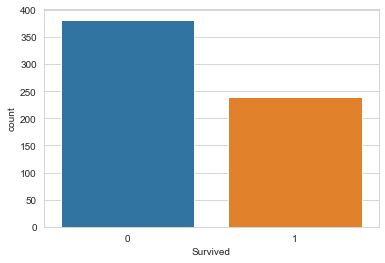

In [98]:
sns.countplot(x='Survived', data=df_train)

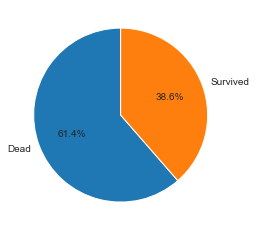

In [99]:
sizes = [len(df_train[df_train['Survived']==0]), len(df_train[df_train['Survived']==1])]
labels = ['Dead', 'Survived']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

In [100]:
# Sebenarnya data diatas itu balanced
# tapi kita anggap gak imbang, buat latihan metode Over/Under Sampling & SMOTE

In [101]:
# Step selanjutnya, pisahkan mana yg mayritas dan mana yg minoritas

not_survived = df_train[df_train['Survived']==0]
survived = df_train[df_train['Survived']==1]

In [102]:
not_survived

,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S,Survived
293,3,24.0,0,0,8.8500,0,0,0,1,0
173,3,21.0,0,0,7.9250,1,0,0,1,0
450,2,36.0,1,2,27.7500,1,0,0,1,0
361,2,29.0,1,0,27.7208,1,1,0,0,0
332,1,38.0,0,1,153.4625,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
122,2,32.5,1,0,30.0708,1,1,0,0,0
20,2,35.0,0,0,26.0000,1,0,0,1,0
72,2,21.0,0,0,73.5000,1,0,0,1,0
436,3,21.0,2,2,34.3750,0,0,0,1,0


In [103]:
#cek data udh terpisah belum
survived['Survived'].unique() #--> data udh kepisah

array([1], dtype=int64)

In [104]:
from sklearn.utils import resample

#oversampling survived
survived_upsampled = resample(survived, #siapa yg mau di resample
                              replace=True,
                              n_samples=len(not_survived), #sebanyak apa samplingnya?, sebanyak not_survived
                              random_state=42
                            )

In [105]:
survived_upsampled

,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S,Survived
400,3,39.0,0,0,7.9250,1,0,0,1,1
762,3,20.0,0,0,7.2292,1,1,0,0,1
641,1,24.0,0,0,69.3000,0,1,0,0,1
328,3,31.0,1,1,20.5250,0,0,0,1,1
747,2,30.0,0,0,13.0000,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
609,1,40.0,0,0,153.4625,0,0,0,1,1
641,1,24.0,0,0,69.3000,0,1,0,0,1
298,1,38.0,0,0,30.5000,1,0,0,1,1
857,1,51.0,0,0,26.5500,1,0,0,1,1


In [106]:
#gabungkan lg not survived dgn survived yg sudh di oversampling (survived_upsampled)
upsampled_train = pd.concat([not_survived, survived_upsampled])

In [107]:
upsampled_train

,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S,Survived
293,3,24.0,0,0,8.8500,0,0,0,1,0
173,3,21.0,0,0,7.9250,1,0,0,1,0
450,2,36.0,1,2,27.7500,1,0,0,1,0
361,2,29.0,1,0,27.7208,1,1,0,0,0
332,1,38.0,0,1,153.4625,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
609,1,40.0,0,0,153.4625,0,0,0,1,1
641,1,24.0,0,0,69.3000,0,1,0,0,1
298,1,38.0,0,0,30.5000,1,0,0,1,1
857,1,51.0,0,0,26.5500,1,0,0,1,1


In [108]:
#Cek balanced gak?
upsampled_train.Survived.value_counts()

1    382
0    382
Name: Survived, dtype: int64

In [109]:
#split balikin lagi jd X_train dan y_train --> tp namana diganti jd Xup_train
Xup_train = upsampled_train.drop('Survived', axis=1)
yup_train = upsampled_train['Survived']

In [110]:
Xup_train

,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
293,3,24.0,0,0,8.8500,0,0,0,1
173,3,21.0,0,0,7.9250,1,0,0,1
450,2,36.0,1,2,27.7500,1,0,0,1
361,2,29.0,1,0,27.7208,1,1,0,0
332,1,38.0,0,1,153.4625,1,0,0,1
...,...,...,...,...,...,...,...,...,...
609,1,40.0,0,0,153.4625,0,0,0,1
641,1,24.0,0,0,69.3000,0,1,0,0
298,1,38.0,0,0,30.5000,1,0,0,1
857,1,51.0,0,0,26.5500,1,0,0,1


#### Bikin Model lagi
* kita coba pake Xup_train, yup_train

In [111]:
uplogreg = LogisticRegression(solver='lbfgs') 
uplogreg.fit(Xup_train,yup_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
#Predict
uppred = uplogreg.predict(X_test)
upproba = uplogreg.predict_proba(X_test)

In [113]:
uppred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [114]:
upproba

array([[0.82934731, 0.17065269],
       [0.05275605, 0.94724395],
       [0.12041538, 0.87958462],
       [0.65835737, 0.34164263],
       [0.05408782, 0.94591218],
       [0.82421592, 0.17578408],
       [0.61380924, 0.38619076],
       [0.78732073, 0.21267927],
       [0.04562305, 0.95437695],
       [0.0200809 , 0.9799191 ],
       [0.51918857, 0.48081143],
       [0.32385515, 0.67614485],
       [0.9219799 , 0.0780201 ],
       [0.70137837, 0.29862163],
       [0.83404126, 0.16595874],
       [0.82289166, 0.17710834],
       [0.3832218 , 0.6167782 ],
       [0.6424688 , 0.3575312 ],
       [0.56308686, 0.43691314],
       [0.81234245, 0.18765755],
       [0.59659147, 0.40340853],
       [0.09295301, 0.90704699],
       [0.91538896, 0.08461104],
       [0.27919236, 0.72080764],
       [0.81227042, 0.18772958],
       [0.29495905, 0.70504095],
       [0.50156791, 0.49843209],
       [0.16045281, 0.83954719],
       [0.47198116, 0.52801884],
       [0.62469811, 0.37530189],
       [0.

In [115]:
# Coba kita lihat reportnya

In [116]:
 # ini report yg pk oversampling
print(classification_report(y_test, uppred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83       167
           1       0.69      0.79      0.74       100

    accuracy                           0.79       267
   macro avg       0.78      0.79      0.78       267
weighted avg       0.80      0.79      0.79       267



In [117]:
 #ini yg gak di oversampling
print(classification_report(y_test, pred_survived_test))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       167
           1       0.74      0.75      0.74       100

    accuracy                           0.81       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.81      0.81      0.81       267



In [118]:
# pake data yg lama (before oversampling) malah punya score yg lbh bagus

## Undersampling

In [119]:
survived

,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S,Survived
486,1,35.00,1,0,90.0000,0,0,0,1,1
469,3,0.75,2,1,19.2583,0,1,0,0,1
334,1,38.00,1,0,133.6500,0,0,0,1,1
681,1,27.00,0,0,76.7292,1,1,0,0,1
136,1,19.00,0,2,26.2833,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
615,2,24.00,1,2,65.0000,0,0,0,1,1
701,1,35.00,0,0,26.2875,1,0,0,1,1
107,3,25.00,0,0,7.7750,1,0,0,1,1
271,3,25.00,0,0,0.0000,1,0,0,1,1


In [120]:
not_survived

,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S,Survived
293,3,24.0,0,0,8.8500,0,0,0,1,0
173,3,21.0,0,0,7.9250,1,0,0,1,0
450,2,36.0,1,2,27.7500,1,0,0,1,0
361,2,29.0,1,0,27.7208,1,1,0,0,0
332,1,38.0,0,1,153.4625,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
122,2,32.5,1,0,30.0708,1,1,0,0,0
20,2,35.0,0,0,26.0000,1,0,0,1,0
72,2,21.0,0,0,73.5000,1,0,0,1,0
436,3,21.0,2,2,34.3750,0,0,0,1,0


In [121]:
# karena mau undersampling --> data mayoritas (not_survived) kita undersampling? kurangin datanya

In [122]:
not_survived_downsampled = resample(not_survived,
                                    replace=False,
                                    n_samples=len(survived),
                                    random_state=42
                                   )

#gabungin 
downsampled = pd.concat([not_survived_downsampled, survived])

In [123]:
downsampled # data train yg sudah di undersampling

,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S,Survived
96,1,71.0,0,0,34.6542,1,1,0,0,0
773,3,25.0,0,0,7.2250,1,1,0,0,0
349,3,42.0,0,0,8.6625,1,0,0,1,0
402,3,21.0,1,0,9.8250,0,0,0,1,0
542,3,11.0,4,2,31.2750,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
615,2,24.0,1,2,65.0000,0,0,0,1,1
701,1,35.0,0,0,26.2875,1,0,0,1,1
107,3,25.0,0,0,7.7750,1,0,0,1,1
271,3,25.0,0,0,0.0000,1,0,0,1,1


In [124]:
Xdown_train = downsampled.drop('Survived', axis=1)
ydown_train = downsampled['Survived']

In [125]:
downlogreg = LogisticRegression().fit(Xdown_train,ydown_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [126]:
#predict
downpred = downlogreg.predict(X_test)
downproba = downlogreg.predict_proba(X_test)

In [127]:
downpred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [128]:
downproba

array([[0.8334821 , 0.1665179 ],
       [0.02846443, 0.97153557],
       [0.17092949, 0.82907051],
       [0.6692062 , 0.3307938 ],
       [0.02813218, 0.97186782],
       [0.82879661, 0.17120339],
       [0.62445654, 0.37554346],
       [0.79094373, 0.20905627],
       [0.04111113, 0.95888887],
       [0.01945802, 0.98054198],
       [0.51732507, 0.48267493],
       [0.36177993, 0.63822007],
       [0.92538212, 0.07461788],
       [0.78161001, 0.21838999],
       [0.83738831, 0.16261169],
       [0.81953641, 0.18046359],
       [0.426999  , 0.573001  ],
       [0.69998146, 0.30001854],
       [0.59430238, 0.40569762],
       [0.81646517, 0.18353483],
       [0.66367655, 0.33632345],
       [0.06882644, 0.93117356],
       [0.89718267, 0.10281733],
       [0.33641698, 0.66358302],
       [0.81631188, 0.18368812],
       [0.35414541, 0.64585459],
       [0.57222676, 0.42777324],
       [0.11975389, 0.88024611],
       [0.46832582, 0.53167418],
       [0.63744826, 0.36255174],
       [0.

In [129]:
 # ini report yg pk undersampling
print(classification_report(y_test, downpred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       167
           1       0.69      0.81      0.74       100

    accuracy                           0.79       267
   macro avg       0.78      0.79      0.78       267
weighted avg       0.80      0.79      0.79       267



In [130]:
 # ini report yg pk oversampling
print(classification_report(y_test, uppred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83       167
           1       0.69      0.79      0.74       100

    accuracy                           0.79       267
   macro avg       0.78      0.79      0.78       267
weighted avg       0.80      0.79      0.79       267



### Evaluasi metode upper,under sampling dgn ROC AUC

In [131]:
upscore1 = upproba[:,1]
fpr_up1, tpr_up1, threshold_up1 = roc_curve(y_test, upscore1)
roc_auc_up1 = auc(fpr_up1, tpr_up1)

downscore1 = downproba[:,1]
fpr_down1, tpr_down1, threshold_down1 = roc_curve(y_test, downscore1)
roc_auc_down1 =auc(fpr_down1, tpr_down1)

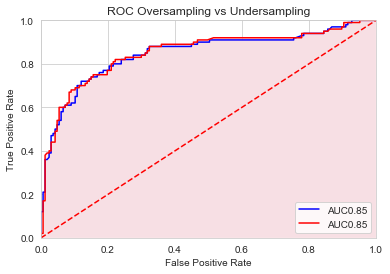

In [132]:
#BIKIN PLOTNYA
plt.title('ROC Oversampling vs Undersampling')
plt.plot(fpr_up1, tpr_up1, 'blue', label='AUC{}'.format(round(roc_auc_up1,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_up1,tpr_up1, 0, facecolor='azure', alpha=1)

plt.plot(fpr_down1, tpr_down1, 'red', label='AUC{}'.format(round(roc_auc_down1,2)))
plt.fill_between(fpr_down1, tpr_down1, 0, facecolor='pink', alpha=0.5)

plt.legend(loc = 'lower right')
plt.show()

In [133]:
# SCORE AUC Over/Undersampling gak terlalu beda jauh 

## SMOTE

In [134]:
#Untuk Metode Smote, menggunakan library imbalanced-learn

In [135]:
#Cek Versi library imbalanced-learn
import imblearn
imblearn.__version__

'0.6.2'

In [136]:
from imblearn.over_sampling import SMOTE

In [137]:
#sampling_strategy=1.0 --> data yg gak balanced, dijadikan balanced dgn perbandingan 1:1

sm = SMOTE(random_state=42, sampling_strategy=1.0, k_neighbors=5)

Xsmot_train, ysmot_train = sm.fit_sample(X_train,y_train)

In [138]:
Xsmot_train #--> awalnya 622 jd 722

,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,1,35.000000,1,0,90.000000,0,0,0,1
1,3,24.000000,0,0,8.850000,0,0,0,1
2,3,21.000000,0,0,7.925000,1,0,0,1
3,2,36.000000,1,2,27.750000,1,0,0,1
4,2,29.000000,1,0,27.720800,1,1,0,0
...,...,...,...,...,...,...,...,...,...
759,1,37.194575,0,0,80.347730,0,0,0,0
760,1,38.000000,0,0,30.088224,1,0,0,0
761,1,23.118061,0,1,51.714394,0,1,0,0
762,1,50.184074,1,0,77.336038,0,1,0,0


In [139]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
486,1,35.0,1,0,90.0000,0,0,0,1
293,3,24.0,0,0,8.8500,0,0,0,1
173,3,21.0,0,0,7.9250,1,0,0,1
450,2,36.0,1,2,27.7500,1,0,0,1
361,2,29.0,1,0,27.7208,1,1,0,0
...,...,...,...,...,...,...,...,...,...
107,3,25.0,0,0,7.7750,1,0,0,1
271,3,25.0,0,0,0.0000,1,0,0,1
862,1,48.0,0,0,25.9292,0,0,0,1
436,3,21.0,2,2,34.3750,0,0,0,1


In [140]:
ysmot_train.value_counts()

1    382
0    382
Name: Survived, dtype: int64

In [141]:
smlogreg = LogisticRegression()
smlogreg.fit(Xsmot_train,ysmot_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [142]:
smpred = smlogreg.predict(X_test)
smproba = smlogreg.predict_proba(X_test)

In [143]:
smpred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [144]:
smproba

array([[0.86047219, 0.13952781],
       [0.04188513, 0.95811487],
       [0.16727796, 0.83272204],
       [0.68509908, 0.31490092],
       [0.0297146 , 0.9702854 ],
       [0.85469234, 0.14530766],
       [0.63036675, 0.36963325],
       [0.81412405, 0.18587595],
       [0.06138664, 0.93861336],
       [0.02081844, 0.97918156],
       [0.51877816, 0.48122184],
       [0.40739575, 0.59260425],
       [0.94981906, 0.05018094],
       [0.82846788, 0.17153212],
       [0.86592216, 0.13407784],
       [0.8576968 , 0.1423032 ],
       [0.58355888, 0.41644112],
       [0.71577752, 0.28422248],
       [0.67487763, 0.32512237],
       [0.84198116, 0.15801884],
       [0.85806261, 0.14193739],
       [0.07229937, 0.92770063],
       [0.92947961, 0.07052039],
       [0.32348   , 0.67652   ],
       [0.84194909, 0.15805091],
       [0.34515189, 0.65484811],
       [0.57914042, 0.42085958],
       [0.09131596, 0.90868404],
       [0.49742715, 0.50257285],
       [0.64253879, 0.35746121],
       [0.

In [145]:
print(classification_report(y_test, smpred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       167
           1       0.72      0.76      0.74       100

    accuracy                           0.80       267
   macro avg       0.78      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



In [146]:
#coba bandingin sama oversampling
print(classification_report(y_test, uppred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83       167
           1       0.69      0.79      0.74       100

    accuracy                           0.79       267
   macro avg       0.78      0.79      0.78       267
weighted avg       0.80      0.79      0.79       267



In [147]:
#coba bandingin sama undersampling
print(classification_report(y_test, downpred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       167
           1       0.69      0.81      0.74       100

    accuracy                           0.79       267
   macro avg       0.78      0.79      0.78       267
weighted avg       0.80      0.79      0.79       267



In [148]:
#coba bandingin sama data asli
print(classification_report(y_test, pred_survived_test))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       167
           1       0.74      0.75      0.74       100

    accuracy                           0.81       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.81      0.81      0.81       267



* Jika dengan metode Over/Undersampling & SMOTE blm merasa puas dengan skornya, maka bisa coba gunakan model lain

# Decision Tree